## PCA Python - Wine Dataset

A wine seller has analyzed the chemical properties of the wines she sells according to the customer segments so that for the new wines she gets she can determine which customer segment is more likely to buy certain wines (so that she can advertise accordingly). However, going forward, she doesn't want to analyze all these chemical properties of the new wines and she wants to determine the most important 2 chemical properties so that she can use only those properties to predict which customer segment would be interested in a given wine.

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline
- Customer Segment (1, 2 or 3)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Wine.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
X=dataset.drop("Customer_Segment",axis=1)

In [8]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [9]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:>

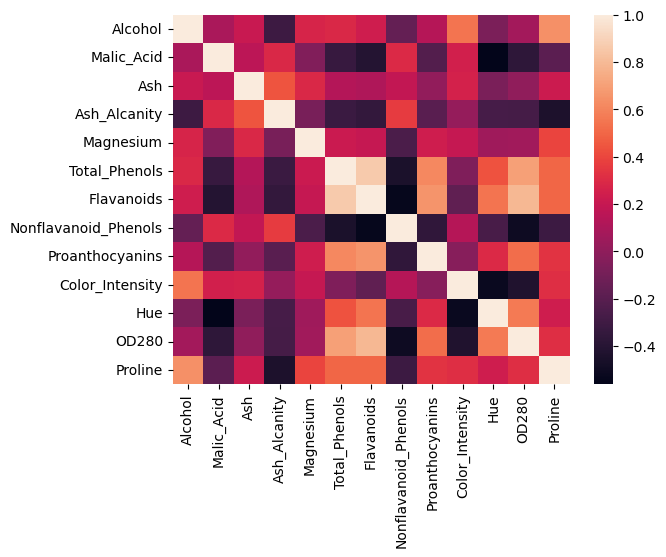

In [10]:
sns.heatmap(X.corr())

In [11]:
y=dataset["Customer_Segment"]

In [12]:
y.describe()

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Customer_Segment, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_

In [16]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

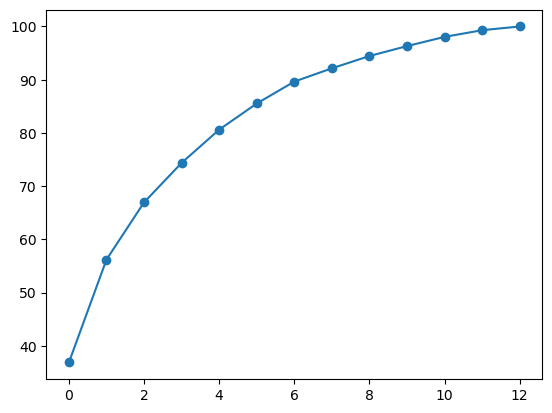

In [17]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [18]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<AxesSubplot:>

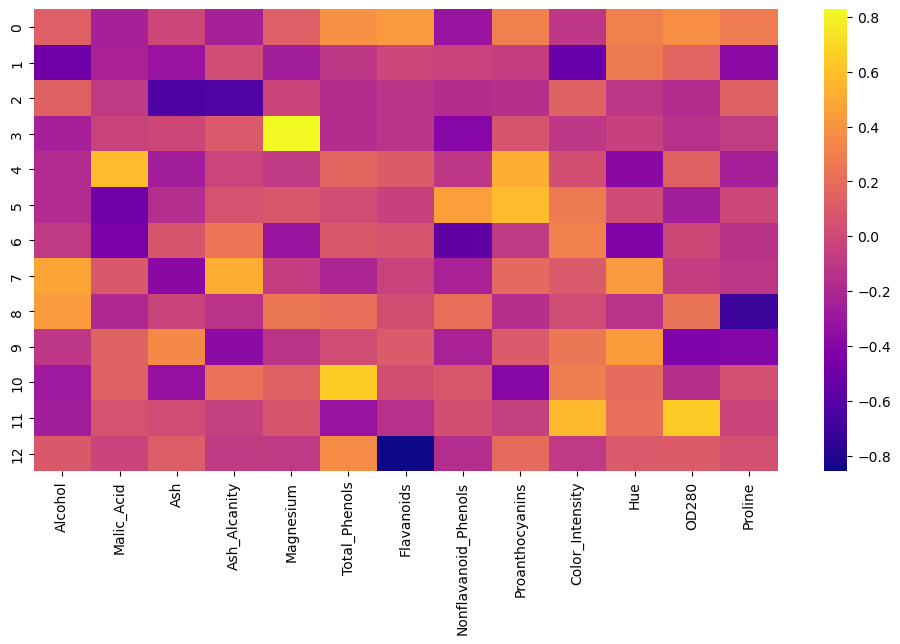

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [20]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train_pca)
X_test2 = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.36884109, 0.19318394])

In [22]:
sum(explained_variance)

0.5620250359227312

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<AxesSubplot:>

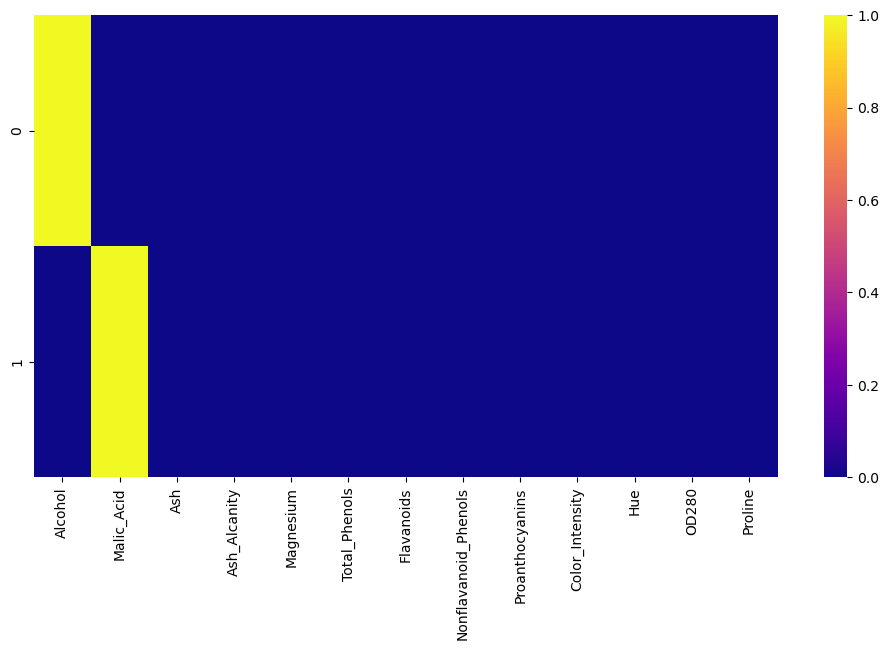

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver="lbfgs",multi_class='auto')
classifier.fit(X_train2, y_train)

# Predicting the Test set results
predictions = classifier.predict(X_test2)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



Since the model performance is quite good, I would leave the number of pca components as 2. 

In [28]:
y_test.value_counts()

2    16
1    14
3     6
Name: Customer_Segment, dtype: int64

Text(0, 0.5, 'Second Principal Component')

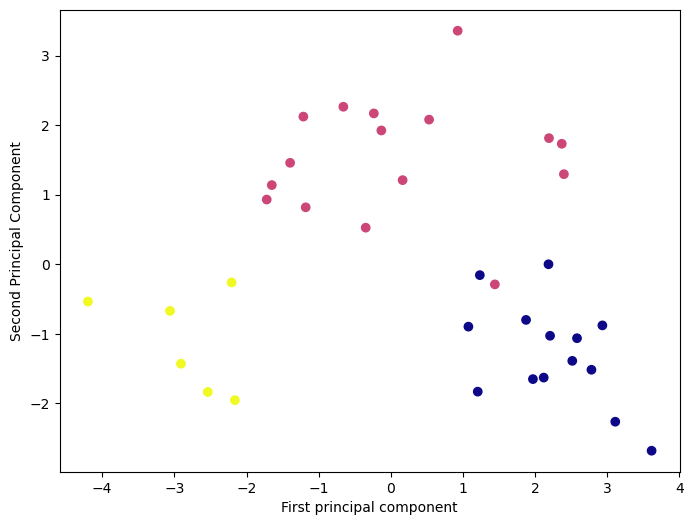

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_test2[:,0],X_test2[:,1],c=y_test,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [30]:
# Alternative to Above - Pipeline

I kept the parameters exactly the same as above in Grid Search

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA()),
                ('LR', LogisticRegression(random_state = 0, multi_class = 'auto'))])

In [33]:
param_grid = {'pca__n_components':[2], # choose the number of pca components
        'LR__solver': ['lbfgs']}

In [34]:
grid = GridSearchCV(estimator=pipe,param_grid=param_grid,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END LR__solver=lbfgs, pca__n_components=2;, score=0.966 total time=   0.0s
[CV 2/5] END LR__solver=lbfgs, pca__n_components=2;, score=0.897 total time=   0.0s
[CV 3/5] END LR__solver=lbfgs, pca__n_components=2;, score=1.000 total time=   0.0s
[CV 4/5] END LR__solver=lbfgs, pca__n_components=2;, score=0.964 total time=   0.0s
[CV 5/5] END LR__solver=lbfgs, pca__n_components=2;, score=1.000 total time=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('LR',
                                        LogisticRegression(random_state=0))]),
             param_grid={'LR__solver': ['lbfgs'], 'pca__n_components': [2]},
             verbose=3)

In [36]:
grid.best_params_

{'LR__solver': 'lbfgs', 'pca__n_components': 2}

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [39]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

